In [1]:
import re

import matplotlib.pyplot
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.float_format', '{:.2f}'.format)

Mini to do list
* create two csv files, one for male the other for female
* check for bad values
* modify event distance to be only a number with a separate column to identify the race format
* Create a start date and end date column, since there are ultras that start on one day and end on another
* Convert athlete birth to int
* get rid of the m and w in athlete age category

Column completion checklist:
* year of event
* event dates
* event_name

In [2]:
df = pd.read_csv('../data/ultra_marathons.csv')
df.sample(5)

C:\Users\OMEN\AppData\Local\Temp\ipykernel_2768\4278176657.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/ultra_marathons.csv')


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
150814,2018,08.04.2018,Ebershauser 50 km Lauf (GER),50km,133,5:13:30 h,FC Deutsche Post,GER,1965.00,M,M50,9.569,2117
5933507,2014,25.01.2014,Coldwater Rumble 52K Race (USA),50km,41,9:39:16 h,"*Pasadena, CA",USA,1973.00,M,M40,5.18,519876
1072988,2016,24.09.2016,Run Around Taipei 60 Km (TPE),60km,63,7:51:06 h,NaN,TPE,1974.00,M,M40,7.64,17512
3537499,2022,28.-31.12.2022,"Across the Years, 72h (USA)",72h,62,101.171 km,"*San Marcos, TX",USA,1977.00,F,W40,1.405,1029097
6544993,2015,18.04.2015,Loskop Ultra Marathon 50km (RSA),50km,2011,3:52:48 h,Polokwane Athletic Club,RSA,1974.00,M,M40,12.89,106464


In [3]:
df['Athlete year of birth'] = df['Athlete year of birth'][df['Athlete year of birth'].notnull()].astype(int)
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.00,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.00,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.00,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.00,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.00,M,M23,8.469,4


In [4]:
df.isnull().sum()

Year of event                      0
Event dates                        0
Event name                         0
Event distance/length           1053
Event number of finishers          0
Athlete performance                2
Athlete club                 2826524
Athlete country                    3
Athlete year of birth         588161
Athlete gender                     7
Athlete age category          584938
Athlete average speed            224
Athlete ID                         0
dtype: int64

In [5]:
df['Athlete gender'].value_counts()

Athlete gender
M    6035358
F    1425784
X         46
Name: count, dtype: int64

In [6]:
x_gender = df[df['Athlete gender'] == 'X']['Athlete ID'].unique()

In [7]:
df[df['Athlete ID'].isin(list(x_gender))].sort_values(by = 'Athlete gender').head(5)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
7347395,1993,31.07.-01.08.1993,Vermont 100 Mile Endurance Race (USA),100mi,164,21:19:33 h,NaN,USA,1963.00,M,M23,7546.00,420655
2075210,2019,04.05.2019,Wilsons Promontory 60 km Trail Race (AUS),60km,84,8:26:01 h,NaN,AUS,NaN,M,NaN,7.114,420655
1636639,2017,28.-29.07.2017,Lakeland 50 Mile (GBR),50mi,662,7:51:42 h,Team Montane,GBR,1992.00,M,M23,10.235,609724
5423236,2012,11.-12.08.2012,North Downs Way 100 Mile Race (GBR),100mi,69,29:34:00 h,NaN,GBR,1976.00,M,M35,5.44,609724
5450501,2012,30.06.-01.07.2012,Round The Island Isle of Wight Multistage Ultr...,70mi/2Etappen,94,14:53:11 h,NaN,GBR,1976.00,M,M35,7.568,609724


In [8]:
df['Athlete gender'][df['Athlete ID'].isin([420655, 609724])] = 'M'
df[df['Athlete gender'] == 'X'].head()

C:\Users\OMEN\AppData\Local\Temp\ipykernel_2768\352007257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Athlete gender'][df['Athlete ID'].isin([420655, 609724])] = 'M'


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
73627,2018,21.01.2018,Zhenxibao (Cinsbu) 54 km Ultramarathon (TPE),54km,926,8:48:43 h,NaN,TPE,1988.00,X,NaN,6.13,63250
151581,2018,08.04.2018,Cape Cod 50K Trail Race (USA),50km,50,6:26:26 h,"*Plymouth, MA",USA,1999.00,X,NaN,7.763,120517
291422,2018,19.05.2018,Silver State 50 Mile (USA),50mi,79,12:22:41 h,"*San Francisco, CA",USA,1975.00,X,NaN,6.50,201998
596645,2018,08.12.2018,Hunter S. Thompson Fear & Loathing 50 Km (USA),50km,47,5:48:00 h,"*San Francisco, CA",USA,1975.00,X,NaN,8.621,201998
617444,2018,24.11.2018,Quad Dipsea Trail Run (USA),28mi,279,5:51:40 h,"*San Francisco, CA",USA,1975.00,X,NaN,7.688,201998


In [9]:
new_columns = {
    'Year of event': 'year_of_event',
    'Event dates': 'event_dates',
    'Event name': 'event_name',
    'Event distance/length': 'distance_or_length',
    'Event number of finishers': 'no_of_finishers',
    'Athlete performance': 'athlete_performance',
    'Athlete club': 'athlete_club',
    'Athlete country': 'athlete_country',
    'Athlete year of birth': 'birth_year',
    'Athlete gender': 'gender',
    'Athlete age category': 'age_category',
    'Athlete average speed': 'average_speed',
    'Athlete ID': 'athlete_id'
}
df.rename(columns = new_columns, inplace = True)
df.head()

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.00,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.00,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.00,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.00,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.00,M,M23,8.469,4


In [10]:
df['age_category'].value_counts().sort_index()

age_category
F35           1
M20       18836
M23     1228209
M30       23493
M35      989217
M40     1054195
M45      908337
M50      626637
M55      351116
M60      168131
M65       66603
M70       21698
M75        5502
M80        1225
M85         164
M90          19
M95          28
MU20       1355
MU23     100183
W20        2890
W23      314473
W30        4385
W35      245020
W40      264967
W45      221291
W50      135437
W55       64656
W60       25664
W65        8810
W70        2850
W75         873
W80         123
W85           8
W90           2
W95           3
WU20        316
WU23      19540
Name: count, dtype: int64

In [11]:
df['age_category'][df['age_category'] == 'F35'] = 'W35'

C:\Users\OMEN\AppData\Local\Temp\ipykernel_2768\225229111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_category'][df['age_category'] == 'F35'] = 'W35'


In [12]:
old_age_cats = ['MU23', 'MU20', 'WU20', 'WU23']

def change_age_cats(row):
    gender = 'W' if row['gender'] == 'F' else 'M'
    try:
        birth_year = int(row['birth_year'])
        int('year_of_event')
    except:
        return gender + '0'
    age = int(row['year_of_event']) - birth_year
    age_group = int(age) if age % 23 == 0 else int(age / 5) * 5
    return gender + str(abs(age_group))


df.loc[df['age_category'].isin(old_age_cats), 'age_category'] = df[df['age_category'].isin(
    old_age_cats)].apply(change_age_cats, axis=1)

In [13]:
df['age_category'].value_counts().sort_index()

age_category
M0      101538
M20      18836
M23    1228209
M30      23493
M35     989217
M40    1054195
M45     908337
M50     626637
M55     351116
M60     168131
M65      66603
M70      21698
M75       5502
M80       1225
M85        164
M90         19
M95         28
W0       19856
W20       2890
W23     314473
W30       4385
W35     245021
W40     264967
W45     221291
W50     135437
W55      64656
W60      25664
W65       8810
W70       2850
W75        873
W80        123
W85          8
W90          2
W95          3
Name: count, dtype: int64

c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='birth_year', ylabel='Count'>

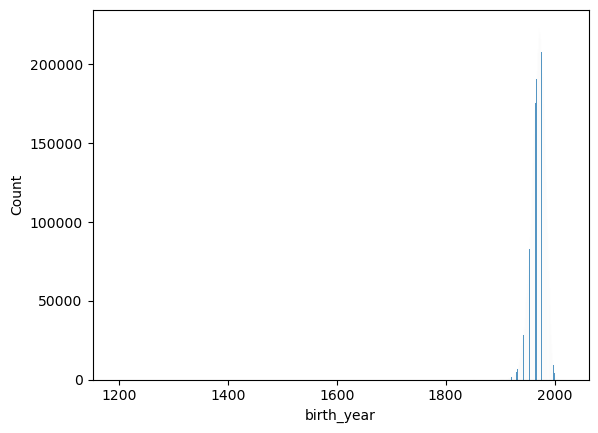

In [14]:
sns.histplot(data = df, x = 'birth_year')

In [15]:
df['birth_year'].describe()

count   6873034.00
mean       1969.76
std          13.13
min        1193.00
25%        1962.00
50%        1971.00
75%        1979.00
max        2021.00
Name: birth_year, dtype: float64

In [16]:
df[df['birth_year'] < (2023 - 90)].sort_values(by = 'birth_year', ascending = True)

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id
2582496,2020,19.06.2020,Dalat Ultra Trail - 45km (VIE),45km,224,8:49:50 h,Adidasrunnerssaigon,VIE,1193.00,M,NaN,5.096,819254
6824337,1807,12.-13.10.1807,24 h Newmarket (GBR),24h,2,64.374 km,*Lancashire,GBR,1786.00,M,M0,2682.00,1520516
6824339,1837,30.01.1837,London to Brighton Race (GBR),85km,1,8:37:00 h,NaN,GBR,1791.00,M,M45,9865.00,340384
6824825,1892,02.-03.09.1892,100 km Geneve-Preverenges-Geneve (SUI),100km,10,22:00:00 h,*Anières,SUI,1816.00,M,M75,4545.00,1520678
6825034,1892,05.-15.06.1892,Paris-Belfort (FRA),496km,29,9d 05:57:00 h,*Douai Le Doyen,FRA,1817.00,M,M70,2235.00,1520872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985148,1982,18.04.1982,American River 50 Mile Endurance Run (USA),50mi,324,9:37:09 h,NaN,USA,1932.00,M,M45,8365.00,1571286
6985195,1982,18.04.1982,American River 50 Mile Endurance Run (USA),50mi,324,10:06:25 h,NaN,USA,1932.00,M,M45,7962.00,1564063
6985220,1982,18.04.1982,American River 50 Mile Endurance Run (USA),50mi,324,10:24:41 h,NaN,USA,1932.00,M,M45,7729.00,1574678
6984764,1982,24.04.1982,"100 km du Périgord Noir, Belves (FRA)",100km,393,15:31:00 h,*Volvic,FRA,1932.00,M,M45,6445.00,1570738


In [17]:
df['birth_year'][df['birth_year'] < 1700] = np.nan

C:\Users\OMEN\AppData\Local\Temp\ipykernel_2768\2201173365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['birth_year'][df['birth_year'] < 1700] = np.nan


In [18]:
df['year_of_event'].describe()

count   7461195.00
mean       2011.98
std          10.01
min        1798.00
25%        2010.00
50%        2015.00
75%        2018.00
max        2022.00
Name: year_of_event, dtype: float64

In [19]:
df['athlete_club'].fillna('Unknown', inplace = True)
df['athlete_club'].isnull().sum()

0

In [20]:
df['distance_or_length'].value_counts()

distance_or_length
50km              1522609
100km              951742
50mi               352181
56km               333253
87km               212062
                   ...   
61.15km                 1
27:30h                  1
178km/2Etappen          1
740km                   1
158.5mi                 1
Name: count, Length: 2159, dtype: int64

In [21]:
df.dtypes

year_of_event            int64
event_dates             object
event_name              object
distance_or_length      object
no_of_finishers          int64
athlete_performance     object
athlete_club            object
athlete_country         object
birth_year             float64
gender                  object
age_category            object
average_speed           object
athlete_id               int64
dtype: object

In [33]:
def can_convert_to_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

df['can_convert'] = df['average_speed'].apply(can_convert_to_float)

# DataFrame with convertible values
convertible_df = df[df['can_convert']]

# DataFrame with non-convertible values
non_convertible_df = df[~df['can_convert']]

print("Convertible to Float:")
print(convertible_df['average_speed'].value_counts())

print("\nNot Convertible to Float:")
print(non_convertible_df['average_speed'].value_counts())
df.drop('can_convert', inplace = True)


Convertible to Float:
average_speed
7         3210
8         3098
4.167     2864
0         2857
10        2421
          ... 
15.654       1
15.547       1
15.426       1
29.185       1
4128.0       1
Name: count, Length: 45918, dtype: int64

Not Convertible to Float:
average_speed
07:00:00    977
12:00:00    790
08:00:00    774
10:00:00    742
00:00:00    691
           ... 
08:31:30      1
08:28:02      1
07:54:04      1
07:47:04      1
09:48:55      1
Name: count, Length: 1326, dtype: int64


KeyError: "['can_convert'] not found in axis"

In [25]:
pattern = r'(\d+)([a-zA-Z]+)'

df[['distance_or_length', 'race_metric']] = df['distance_or_length'].str.extract(pattern)

df['distance_or_length'] = pd.to_numeric(df['distance_or_length'], errors='coerce')
df.head()

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,can_convert,race_metric
0,2018,06.01.2018,Selva Costera (CHI),50.00,22,4:51:39 h,Tnfrc,CHI,1978.00,M,M35,10.286,0,True,km
1,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:15:45 h,Roberto Echeverría,CHI,1981.00,M,M35,9.501,1,True,km
2,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:16:44 h,Puro Trail Osorno,CHI,1987.00,M,M23,9.472,2,True,km
3,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:34:13 h,Columbia,ARG,1976.00,M,M40,8.976,3,True,km
4,2018,06.01.2018,Selva Costera (CHI),50.00,22,5:54:14 h,Baguales Trail,CHI,1992.00,M,M23,8.469,4,True,km


In [26]:
df['race_metric'].value_counts()

race_metric
km         6154371
mi          775930
h           514457
d            12190
Km            1931
Miles          264
miles          234
k              159
Mile            64
mile            58
K               52
m               40
Etappen          5
x                4
Name: count, dtype: int64

In [29]:
df[df['race_metric'] == 'x']

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,can_convert,race_metric
2103612,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,38:31:27 h,"*New Hartford, CT",USA,1977.00,M,M40,0,101669,True,x
2103613,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,47:11:01 h,"*New Hartford, NY",USA,1996.00,F,W0,0,129191,True,x
2103614,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,2d 12:44:40 h,"*Rochester, NY",USA,1964.00,M,M50,0,78349,True,x
2103615,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,2d 20:49:30 h,"*Worcester, MA",USA,1991.00,M,M23,0,181853,True,x


In [31]:
metric_conversion = {
    'miles': 'mi',
    'Miles': 'mi',
    'mile': 'mi',
    'Mile': 'mi',
    'm': 'mi',
    'k': 'km',
    'K': 'km',
    'Km': 'km',
    'Etappen': 'stage',
    'h': 'hours',
    'd': 'days',
    'x': '4x52km'
}

df['race_metric'] = df['race_metric'].replace(metric_conversion)
df['race_metric'].value_counts()

race_metric
km        6156513
mi         776590
hours      514457
days        12190
stage           5
4x52km          4
Name: count, dtype: int64

In [32]:
df[df['race_metric'].isin(['4x52km', 'stage'])]

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,can_convert,race_metric
920115,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,35:46:00 h,LSG Karlsruhe,GER,1978.00,M,M35,0.0,58893,True,stage
920116,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,35:50:00 h,TV Kempten,GER,1961.00,M,M55,0.0,24885,True,stage
920117,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,36:08:01 h,TV Kempten,GER,1963.00,M,M50,0.0,668,True,stage
920118,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,36:15:00 h,LSG Karlsruhe,GER,1966.00,M,M50,0.0,201902,True,stage
920119,2016,26.-29.05.2016,Freundschaftswettkampf Westweg (von Pforzheim ...,4.00,5,37:50:00 h,TV Kempten,GER,1986.00,M,M30,0.0,149352,True,stage
2103612,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,38:31:27 h,"*New Hartford, CT",USA,1977.00,M,M40,0,101669,True,4x52km
2103613,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,47:11:01 h,"*New Hartford, NY",USA,1996.00,F,W0,0,129191,True,4x52km
2103614,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,2d 12:44:40 h,"*Rochester, NY",USA,1964.00,M,M50,0,78349,True,4x52km
2103615,2019,04.-07.07.2019,Notchview Ultra Quadzilla Ultra (USA),4.00,4,2d 20:49:30 h,"*Worcester, MA",USA,1991.00,M,M23,0,181853,True,4x52km


In [37]:
df = df[~df['race_metric'].isin(['4x52km', 'stage'])]
df[df['race_metric'].isin(['4x52km', 'stage'])]

,year_of_event,event_dates,event_name,distance_or_length,no_of_finishers,athlete_performance,athlete_club,athlete_country,birth_year,gender,age_category,average_speed,athlete_id,can_convert,race_metric


In [38]:
df['athlete_country'].value_counts()

athlete_country
USA    1389956
FRA    1170884
RSA     877630
JPN     603132
GER     442051
        ...   
AHO          1
SLE          1
BAR          1
TGA          1
ACT          1
Name: count, Length: 208, dtype: int64

In [ ]:
def add_start_and_end_date(row):
    start, end = row['event_dates'].split('-')
    